# NUMERICAL TOOLS

This Jupyter notebook introduces you to various numerical tools that are necessary for this module. We will be using several of the functions introduced here at different stages of the module. Therefore, we are introducing these here in general terms.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Discretization


When you use computers for mathematical operations, it is typically necessarily to discretize your domain. That is, depending on the problem, you will need to breakdown your line/area/volume (1D/2D/3D) in to infinitisimally small segments/boxes/cuboids so that you can obtain answers at those respective locations. In this module, we will limit ourselves to 1D and 2D.

For example, let's take a 1D domain that goes from $x=$ -4 to +4. There are an infinite number of points that exist within this range. However, for the sake of computations, it is necessary to break this down in to small segments of a given size. We will do so by choosing an infinitisimaly small interval $dx$, which we can choose (In this example, we choose this to be equal to 0.1). In the code below, I use the command $np.arange$ to set up a 1D array that ranges from -4 to 4 in increments of 0.1.

Now, we can define a function in this domain, say $f(x) = 3x^2 + 2x +1$

We can compute this function in the domain we have chosen and plot it accordingly.

Imagine, we wanted to plot another function in the same plot. In this case, the function we want is,
$g = 2x^3 + 6x^2 + 3$.

You need to create the function $g$ as shown below and then plot it as well.
This way, you can plot multiple things in the same plot.


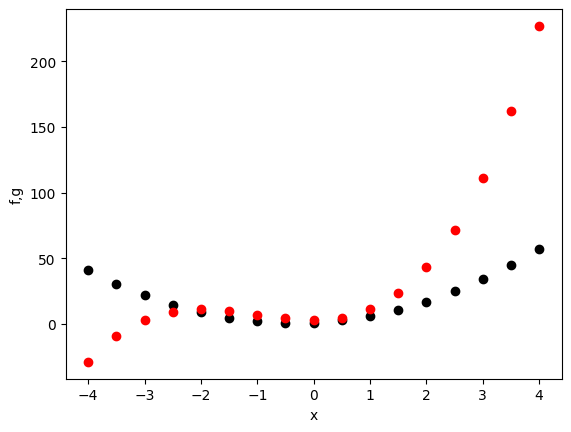

In [2]:
Domain_x_min = -4 #The min range of the x axis
Domain_x_max = 4 #The max range of the x axis

dx = 0.5 # This sets the spacing between successive points in the domain
#Note that you can change the spacing as you wish.
#For Numerical methods, this spacing is really important!
#Finer spacing leads to more accurate results but takes longer for computation

#This command makes 1-D array (or vectors) for x axis
xa= np.arange(Domain_x_min,Domain_x_max+dx,dx)
#Note that I have Domain_x_max + dx here because the python command "arange" usually does not include the last point

f = 3*xa**2 + 2*xa + 1 #Computing the function and this will give us a 1D array of f

g = 2*xa**3 + 6*xa**2 + 3 #Computing the function and this will give us a 1D array of g

plt.figure(1)
plt.plot(xa,f,'ko') #This will plot 'o' symbols in black colour
plt.plot(xa,g,'ro') #This will plot 'o' symbols in red colour

plt.xlabel('x')
plt.ylabel('f,g')
plt.show()


## HOMEWORK

Now that you know, how to discretize a 1D domain, you can create different functions in this domain.
I recommend that you modify the above code as you see fit  code to play around with changing the domain sizes, the functions as well as the type plots in terms of symbols that you want to produce.

## Numerical Differentation/Integration

Most of the time, in engineering applications, we typically integrate or differentiate functions, equations etc in order to solve problems. It used to be done analytically, but, in Aerodynamics this is only applicable for very simple problems. As we develop more and more complex designs, we need to be able to integrate and differentiate using Computers. So, we will start with simple implmentations of numerical integration and differentiation using the same two functions that you have above.

### Numerical integration

There are several ways to carry this out numerically and in your first-year module you were exposed to some of them. This include Trapezoidal rule, Simpson's rule etc. In the example below, we will carry-out integration using Trapezoidal rule, which will use $numpy$ and $np.trapz$.

The accuracy of your integration will be intricately linked to the discretization. Smaller the value of $dx$, the more accurate your integration will be.

In [3]:
int_f = np.trapz(f,xa)
print(int_f)

int_g = np.trapz(g,xa)
print(int_g)


137.0
282.0


## HOMEWORK

Change the values of $dx$ and find out the numerical integration. You can also change the functions $f$ and $g$ to more complicated ones. You can also evaluate the integral between the limits analytically and compare that to the value obtained using numerical integration.

### Numerical differentiation

This can also be done in several different ways. In the lecture slides, we show that it is possible to use Taylor's series to determine the first derivative of a function. This Taylor's series approach can also be used for find higher order derivatives. However, in this module, we will limit ourselves to first derivative.

So, if you have data in a discretised domain, then you can use $np.gradient$ to compute the first derivative. This will compute the first derivative using the central differences scheme in the main domain and use forward/backward differences for the boundary points. The gradient function is indifferent to the value of $dx$. It would just compute it based on the points in the grid. You need to specify the spacing between adjacent points in order to get the dimensionally correct value of the gradient. So, you just need to divide by $dx$.

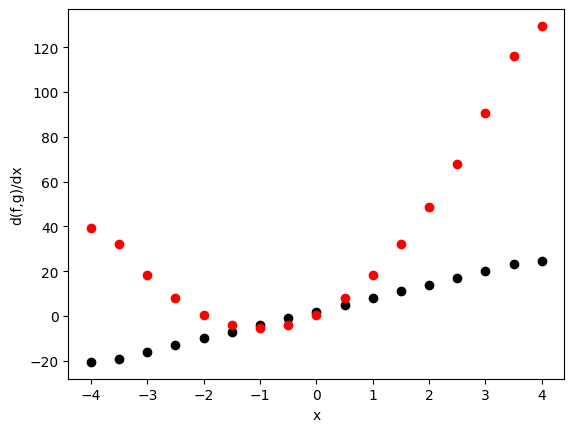

In [4]:
dfdx = np.gradient(f)/dx #division by dx to get the dimensions correct
dgdx = np.gradient(g)/dx #division by dx to get teh dimensions correct

plt.plot(xa,dfdx,'ko') #This will plot 'o' symbols in black colour
plt.plot(xa,dgdx,'ro') #This will plot 'o' symbols in red colour

plt.xlabel('x')
plt.ylabel('d(f,g)/dx')
plt.show()

## HOMEWORK

You can also change the functions $f$ and $g$ to more complicated ones and see if the differentiation works well.  You can also evaluate the differential at a given point analytically and compare that to the value obtained using numerical differentiation.

## Interplotion

Let's imagine that we want to determine the gradient of function f at a point where DO NOT have a grid point. This could also be the value of function $f$ where we do not have a grid point. Either way, we need to find a way to get the value at that point.  


This is done using Interpolation. Typically, we employ linear interpolation that you are all familiar with. In Python, this is done using the numpy command, $np.interp$

To do this, you will need:

1) A set of points where you want the interpolated value. This could be a single point or an array or points


2) A set of points with a known value. This is the original array where you know the coordinates (example: xa)


3) The set of known values. This is the original array where you know the values (for example: f, g, or dfdx or dgdx)

You get this interpolation in a set of points or a single point. The example below is for a single point where we want to obtain the value of $df/dx$ at a $x = -1.2$.

In [5]:
dfdx_interp = np.interp(-1.2,xa,dfdx)

print("dfdx at x = -1.2: ",dfdx_interp)

dfdx at x = -1.2:  -5.199999999999999


## HOMEWORK

The above example was to interpolate at a single point. I suggest that you create a new array of points with finer spacing than what was used before. Then, you the interpolate function to get values at a finer grid spacing. Then, plot the finer grid spacing on the same plot as the original data.

# Discretisation in two-dimensions

Thus far, we have implemented discretisations in 1D. Below, we will repeat this in 2D and most commands that we need to use are identical, but, just adapted to work in 2D.

First, we set up our domain size in two dimension, $x$ and $y$. We create individual 1D arrays with all the $x$ and $y$ coordinates. This is done using the $np.arange$ command as before. There are other ways to setup this 1D array including $np.linspace$.

Next, we need to make a 2D grid from two 1D arrays. This is done using the $np.meshgrid$ command as shown below.
Now, we have a 2D array where each element of the 2D matrix is a given coordinate (x,y). The values of $x$ and $y$ comes from the 1D array $xa$ and $ya$.

In [6]:
Domain_x_min = -4 #The min range of the xl axis
Domain_x_max = 4 #The max range of the x axis
Domain_y_min = -4 #The min range of the y axis
Domain_y_max = 4 #The max range of the y axis

dx = 0.2 # This sets the spacing between successive points in x direction
dy = 0.2 # This sets the spacing between successive points in y direction
#Note that you can change the spacing as you wish.
#For Numerical methods, this spacing is really important!
#Finer spacing leads to more accurate results but takes longer for computation

#This command makes 1-D array (or vectors) for x and y axis
xa= np.arange(Domain_x_min,Domain_x_max+dx,dx)
ya= np.arange(Domain_y_min,Domain_y_max+dy,dy)

#This command makes a mesh (2-D array) that is now our domain
x,y = np.meshgrid(xa,ya)

#All our computations are now in this grid

## Creating and plotting functions in 2D

We can now create 2D functions in this grid. In the example below, we create $f(x,y) = x^3 + y^2$.
Since, this is a now a 2D function, we cannot depict them in line plots. We can only do so with contours.
This is done by using the $contour$ function in matplotlib.

The command typically used to plot these contours is, $plt.contour(x,y,variable,levels,cmap)$. Here, the $variable$ can be the whatever you want to see the variation in $x$ and $y$ directions.

There are two ways to change levels. \\
1. You can set the number of level to an integer. This gives take the total range from minimum value to maximum value of your variable and divide it in to equal number of levels given by the integer. For example, \\
$plt.contour(x,y,f,50)$ will plot contours lines of $f$ at 50 levels. \\

2. You can also specify a range of levels. This is done by creating a numpy array that has the specific levels that you want to show. You can create, $levels = np.arange(min,max,intervals)$ and use this when plotting. For example, $plt.contour(x,z,f,levels)$ where $levels = np.arange(0,1,0.1)$ will plot contour levels from 0 to 1 in intervals of 0.1. \\

You can also get filled contours by using the command $plt.contourf$. All other arguments for this is identical to $plt.contour$. Below, we will use these commands to plot the different things we want.

Finally, we can change the colourmap we use for the plots using the $cmap$ flag. We will use $cmap$ = "hot" or "bwr" or "viridis". However, there is an exhaustive list of colormaps that you can use: https://matplotlib.org/stable/gallery/color/colormap_reference.html


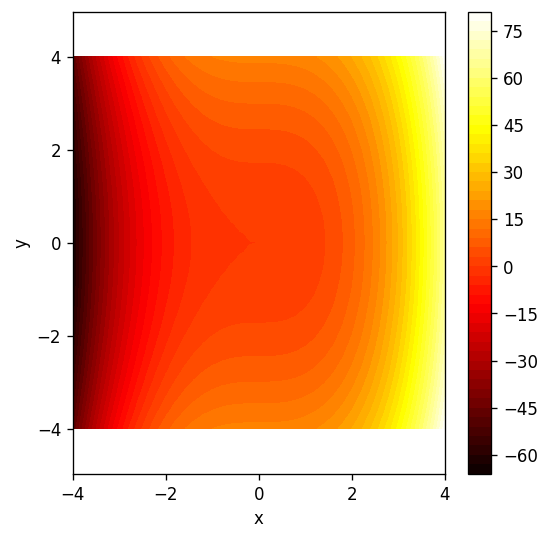

In [7]:
f = x**3 + y**2

# make the plot
plt.figure(figsize=(5,5),dpi=120)

# plot filled contours with a specific colormap
plt.contourf(x,y,f,50,cmap='hot')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

## Interpolating at a point

You can interpolate the data from a 2D array in to a single point to get a value at that point. For this, we need to use the $interpolate$ package from the $Scipy$ library. We are specifically using $RectBivariateSpine$ type interpolation. This uses splines to interpolate values in different cells. There is specific way to call this function and it is done here below.

The code below determine the value of the function $f$ at $(x,y) = (-3.01, 3.15)$ using the interpolation.

In [8]:
from scipy.interpolate import RectBivariateSpline as interp_2D

fun =  interp_2D(ya, xa, f) #You dont need to use 2D array of x and y for this.
#Just the 1D array with coordinates of y and x are needed.
#You also need to pass y coordinates first and then the x coordinates

xanew = -3.01 #This can be a 1D array with a set of points
yanew = 3.15 #This can be a 1D arary with set of points
fnew = fun(yanew, xanew) #This interpolates the values of the function f in the new set of points.
#Note that you need to pass y coodinate first and then the x-coordinate

print(fnew[0])

[-17.348401]


## Interpolating in to a new array

You can also interpolate the function in to a new finer grid. For this you need to create two new 1D arrays with the new values of $x$ and $y$ as shown in the code below. You can then use the same interpolate function to determine the values of $f$ in the new grid. Then, you can create a new 2D array with the coordinates with $np.meshgrid$. Finally, you can plot the new coordinates and the function.

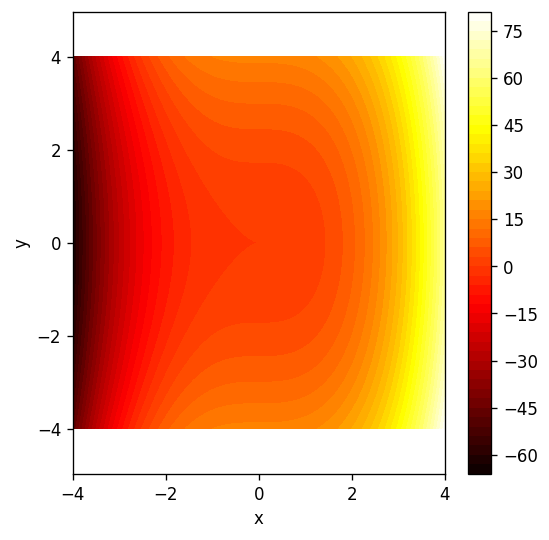

In [9]:
fun =  interp_2D(ya,xa,f) #This interpolates the values of the function f in the new set of points.
#Note that you need to pass y coodinate first and then the x-coordinate

dxnew = 1e-2
dynew = 1e-2
xanew= np.arange(Domain_x_min,Domain_x_max+dxnew,dxnew)
yanew= np.arange(Domain_y_min,Domain_y_max+dynew,dynew)

fnew = fun(yanew,xanew) #This interpolates the values of the function f in the new set of points.

#You can now create a new 2D array using meshgrid to plot the new set of points
xnew,ynew = np.meshgrid(xanew,yanew)

#You can now plot the function that is interpolated on the new grid
plt.figure(figsize=(5,5),dpi=120)       # make the plot
plt.contourf(xnew,ynew,fnew,50,cmap='hot')       # plot filled contours with a specific colormap
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

## Gradients in 2D

Typically, we need to carry out numerical differentiation of functions in two dimensions. This is done using the $np.gradient$ function. In 2D, this np.gradient will compute the first derivative in two directions. The gradient function works exactly as outlined for 1D, except now it will be a 2D matrix with values of first partial derivatves in two directions.

Below, we have code that computes the gradient and assigns it to $\partial f/\partial x$ and $\partial f/\partial y$. We also plot just derivatives in the $x$ and $y$ directions in contour plots.

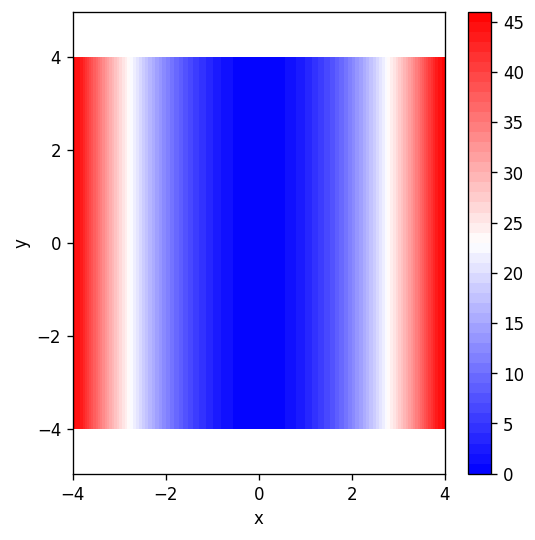

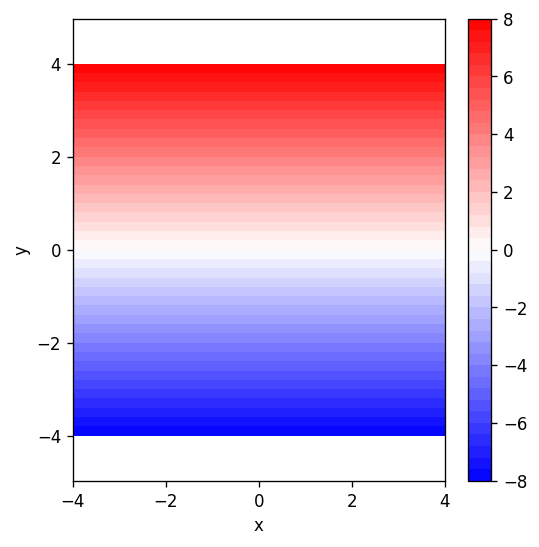

In [10]:
dfdy, dfdx = np.gradient(f) #Computes the gradient and assigns them to the appropriate variables

dfdy = dfdy/dy #The gradient function is indifferent to the value of dy. Hence, you need to divide this to get the dimensions correct
dfdx = dfdx/dx  #The gradient function is indifferent to the value of dx. Hence, you need to divide this to get the dimensions correct

plt.figure(figsize=(5,5),dpi=120)       # make the plot for dfdx
plt.contourf(x,y,dfdx,50,cmap='bwr')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

plt.figure(figsize=(5,5),dpi=120)       # make the plot for dfdy
plt.contourf(x,y,dfdy,50,cmap='bwr')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

As seen in the lecture slides, the gradient operator is in fact a vector! Here, the $\partial f/\partial x$ gives you a rate of change of $f$ in the x-direction and $df/dy$ is the rate of change of $f$ in the $y$ direction.

So, we should also be able to plot this vector  ($\partial f/\partial x$, $\partial f/\partial y$) in 2D. This is done using the $plt.quiver$ function where you can now plot the arrows that show magnitude and direction. You can also change the size of the arrows by using the scale argument.

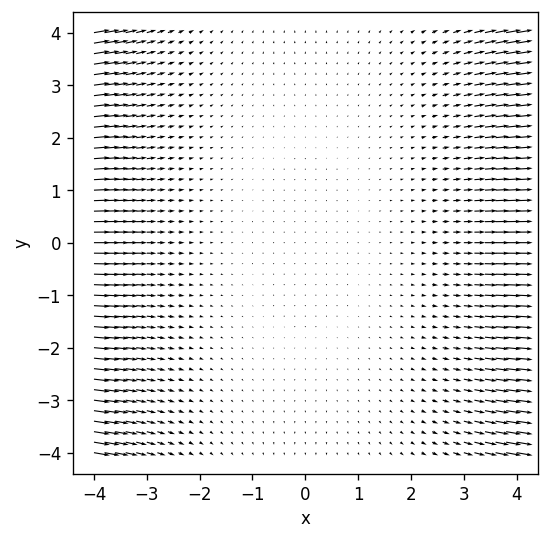

In [11]:
plt.figure(figsize=(5,5),dpi=120)
plt.quiver(x,y,dfdx,dfdy)               # plot the vectors that show the gradient of f in 2D
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Finally, you can plot contours and vectors together so that you can look at this simultaneously. For example, we can plot contours of $f$ and then look at vectors from $\nabla f$. That is just combining what we did in the two previous boxes.

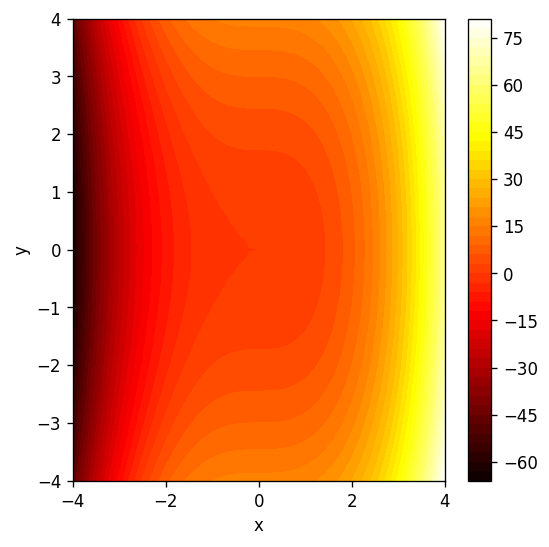

In [12]:
plt.figure(figsize=(5,5),dpi=120)
plt.quiver(x,y,dfdx,dfdy)              # plot the vectors that show the gradient of f in 2D
plt.contourf(x,y,f,50,cmap='hot')       # plot filled contours of the function f
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# HOMEWORK

Try and change functions that you are plotting in 2D as well as computing its gradients. Compute the gradient vector analytically at different values of $(x,y)$ and check if the code computes it correctly.

Use the interpolate function to find the value of function and its gradients at different points that are not on the grid.

You can also interpolate the gradients on to an entirely new grid with finer spacing.

# Divergence of the vector field

Imagine you have a vector field that changes in space such as the one given above. For example, if the $x$ and $y$ components of the vectors are $u$ and $v$, then, we can compute the divergence of this vector field as $\nabla \cdot V$.

In long form, this becomes $\partial u/\partial x$ + $\partial v/\partial y$.

This divergence will be a scalar value that comes from the dot-product of two vectors. This divergence represents expansion or contraction of a vector field at every single point. If the divergence is positive at a point, then, it is expanding and if it is negative then it is contracting.

If the divergence of the vector field is equal to zero at every point in the domain, then, we have a "divergence-free" vector field. This means the vector field is neither expanding or contracting and the quantity is "conserved".

In the area of fluid mechanics, if $(u,v)$ are the velocities and this vector field is divergence-free, then, it is considered to be an incompressible flow and is a manifestation of conservation of mass!


Let us consider a velocity field given by $u = 2x + y^2$ and $v = -2y + x^2$. Let's see what this field would look like and if it is divergence-free


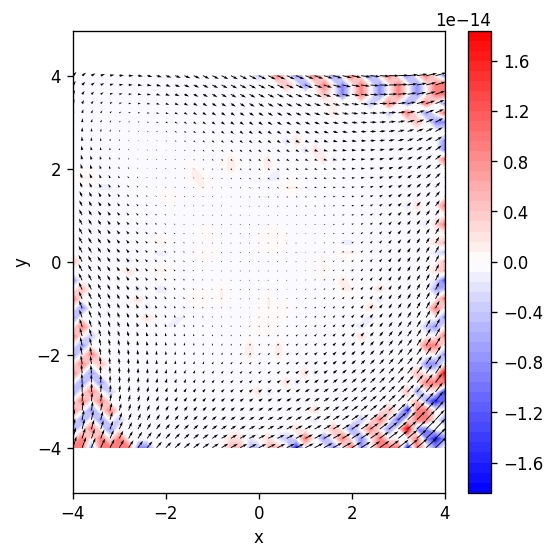

In [13]:
#Example function for u and v
u = 2*x + y**2
v = -2*y + x**2

#Computes gradient of u - This has two components
dudy,dudx = np.gradient(u)

# Computes gradient of v - This has two components
dvdy,dvdx = np.gradient(v)

dudy = dudy/dy
dudx = dudx/dx

dvdy = dvdy/dy
dvdx = dvdx/dx

#This computes the divergence using dudx and dvdy
div_uv = dudx + dvdy

# make the plot
plt.figure(figsize=(5,5),dpi=120)
# plot filled contours of the divergence
plt.contourf(x,y,div_uv,50,cmap='bwr')
plt.colorbar()
# plot the vectors given by u and v
plt.quiver(x,y,u,v)
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The figure above shows that the divergence is zero everywhere in the domain (at least to numerical accuracy)!

## Homework

Put down different functions of for $u$ and $v$ and determine if that given vectorfield is divergence free!

# Curl of a vector field

Let's take the same vector field that changes in space. For example, if the $x$ and $y$ components of the vectors are $u$ and $v$, then, we can compute the Curl of this vector field as $\nabla \times V$.

Since we are in 2D, this Curl has only one component and represent the degree of rotation about an axis at every point.

In long form, this becomes $\partial v/\partial x$ - $\partial u/\partial y$.


If the Curl of the vector field is equal to zero at every point in the domain, then, we have a "irrotational" vector field.

In the area of fluid mechanics, if $(u,v)$ are the velocities and this curl represent the amount of vorticity in the flow. Let's see if the above vector field is irrotational...

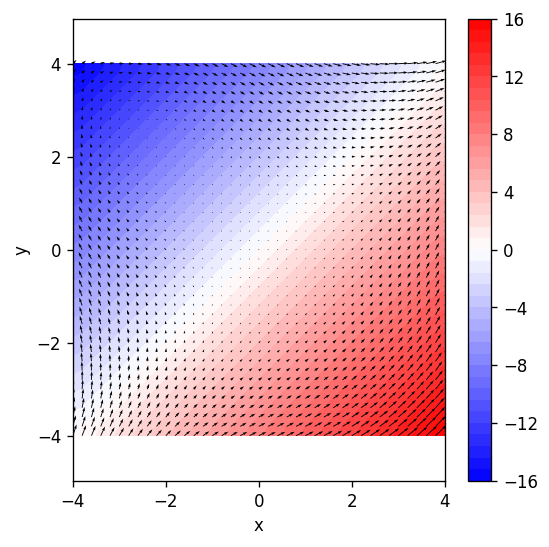

In [14]:
#This computes the curl using dvdx and dudy
curl_uv = dvdx - dudy

# make the plot
plt.figure(figsize=(5,5),dpi=120)

# plot filled contours of curl
plt.contourf(x,y,curl_uv,50,cmap='bwr')
plt.colorbar()
# plot the vectors given by u and v
plt.quiver(x,y,u,v)
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

It is clearly not irrotational! Therefore the vector field has some amount of rotation in it.

### Laplacian of a field

The final numerical calculation that we need to do in a grid is the Laplacian. This is basically the summation of a second derivatives along $x$ and $y$ directions,

$\nabla^2 f$ = $\partial ^2 f/\partial x^2 + \partial ^2 f/\partial y^2$

In fact, the left hand side can be re-written as, $\nabla \cdot \nabla f$. This is the dot product of Del operator with the gradient of $f$. Since both of these are vectors, the Laplacian in this form will be a scalar.

If you look at it carefully, it is basically the gradient of a gradient and we need to need the appropriate items after calcualting the gradient of a gradient.

i.e.,

$\nabla^2 f$ = $(\partial/\partial x)(\partial f/\partial x) + (\partial/\partial y)(\partial f/\partial y) $


Therefore, numerically, we can compute the Laplacian by taking the gradient of a gradient.

Let's try this out with our example, f we had before...

$f(x,y) = x^3 + y^2$

Let's find the Laplacian of this.

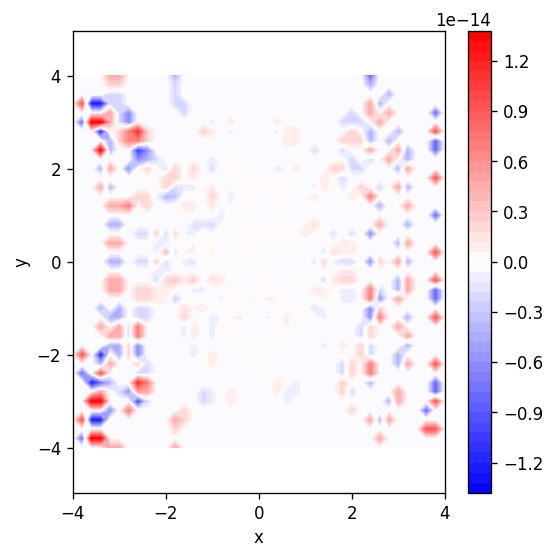

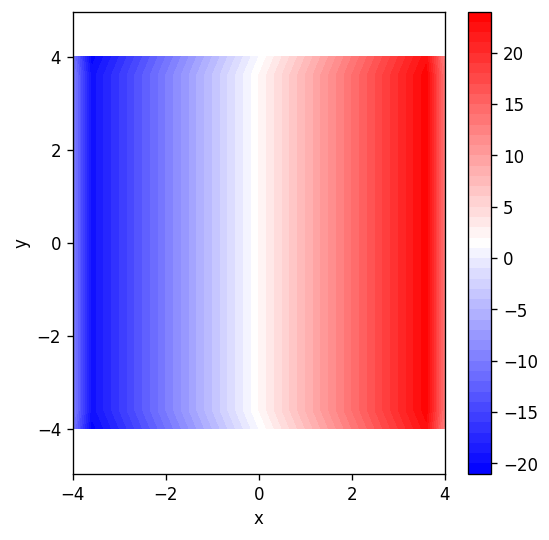

In [15]:
f = x**3 + y**2

dfdy,dfdx = np.gradient(f)

dfdy = dfdy/dy
dfdx = dfdx/dx

d2fdydx,d2fdx2 = np.gradient(dfdx)
d2fdydx = d2fdydx/dy
d2fdx2 = d2fdx2/dx

d2fdy2,d2fdxdy = np.gradient(dfdy)
d2fdy2 = d2fdy2/dy
d2fdxdy = d2fdxdy/dx

#This is just computing the Laplacian
Laplacian_f = d2fdx2 + d2fdy2

#If we computed this correctly, d2fdydx should be equal to d2fdxdy
#So, if we plot the difference between those two quantities, we should get zero...

# make the plot
plt.figure(figsize=(5,5),dpi=120)
# plot filled contours of the cross derivatives
plt.contourf(x,y,d2fdxdy-d2fdydx,50,cmap='bwr')
plt.colorbar()
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# make the plot
plt.figure(figsize=(5,5),dpi=120)
# plot filled contours of the Laplacian
plt.contourf(x,y,Laplacian_f,50,cmap='bwr')
plt.colorbar()
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Let's see if our Laplacian has been computed accurately!

We can work the Lapalcian analytically for the function:

$\nabla^2 f = 3x + 2$

At $x = 0, y = 1$, we should have a value of 2. Is that true?

From the figure above, it looks to be the case, but, be extract this value using our 2D interpolation and see?

In [16]:
fun =  interp_2D(ya,xa,Laplacian_f) #This interpolates the values of the function f in the new set of points.
#Note that you need to pass y coodinate first and then the x-coordinate

#Note that you need to put in the y coordinate first and then the x coordinate
fnew = fun(2,-4) #This interpolates the values of the function f in the new set of points.

print(np.round(fnew[0],4))

[-9.4]


## BOUNDARY PROBLEM!

From the above, the value in at $(0,1)$, appears to be correct. I encourage you to find the value at say $(0,3.9)$.
See if that is correct!

You should notice that when you evaluate the FIRST OR SECOND derivative is not accurate near the boundaries. This is a huge problem and is a result of the numerical method we used. There are several ways to make this better but is beyond this module. You will learn about these in more detail in the future modules.

At this time, make sure that you do not compute gradients (first or second) that are within 2-3 points of the boundary. Always, make sure that the boundries of the entire domain are far enough away from the points where you are interested in the quantities.

## HOMEWORK

Find the Laplacian of different functions and check against your analytical answers. Make sure you are comfortable with interpolating the values from a grid to a point (or a list of points). Check the accuracy of the gradients near the boundaries.